In [1]:
'With or without Baby in carrier seat Detection using RanFor model and SVM model'

'With or without Baby in carrier seat Detection using RanFor model and SVM model'

In [3]:
import gc
gc.collect()

0

In [5]:
%reset -f

In [7]:
# Import every packages for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing

# Add measurements for withoutbaby

In [10]:
import numpy as np
import pandas as pd
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
file_path = 'Carrierseat_withoutbaby_npy_array_Lowpassfiltered_label_0.npy'

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withoutbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0
20996,-372.023810,2781.757042,1.300276,0.0
20997,-279.017857,3850.745335,-1.609702,0.0
20998,-186.011905,3807.554627,1.950552,0.0


In [11]:
num_rows_withoutbaby = len(dataframe_withoutbaby)
num_rows_withoutbaby

21000

In [12]:
fft_magnitudes_withoutbaby = dataframe_withoutbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withoutbaby

array([87853.61468622, 42906.08156416,  3807.5546275 , ...,
        3850.74533502,  3807.5546275 , 42906.08156416], shape=(21000,))

In [13]:
fft_frequencies_withoutbaby = dataframe_withoutbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withoutbaby

array([   0.        ,   93.00595238,  186.01190476, ..., -279.01785714,
       -186.01190476,  -93.00595238], shape=(21000,))

In [14]:
fft_phase_withoutbaby = dataframe_withoutbaby["Phase"].values  # Convert to NumPy array
fft_phase_withoutbaby

array([ 0.        ,  3.0872496 , -1.95055249, ..., -1.60970213,
        1.95055249, -3.0872496 ], shape=(21000,))

In [15]:
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_features(fft_freqs, fft_mags, fft_phase):
    # Normalize magnitudes to prevent division errors
    norm_mags = fft_mags / np.sum(fft_mags) if np.sum(fft_mags) > 0 else fft_mags
    
    # Spectral Centroid (Weighted Mean of Frequencies)
    spectral_centroid = np.sum(fft_freqs * norm_mags) / np.sum(norm_mags)

    # Spectral Bandwidth (Spread around centroid)
    spectral_bandwidth = np.sqrt(np.sum(norm_mags * (fft_freqs - spectral_centroid) ** 2))

    # Spectral Flatness (Geometric Mean / Arithmetic Mean)
    spectral_flatness = np.exp(np.mean(np.log(fft_mags + 1e-10))) / np.mean(fft_mags + 1e-10)

    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(fft_mags, height=0.1 * np.max(fft_mags))  # Adaptive threshold

    # Harmonic Ratio (Ratio of 2nd peak to 1st peak)
    if len(peaks) >= 2:
        harmonic_ratio = fft_mags[peaks[1]] / fft_mags[peaks[0]]
    else:
        harmonic_ratio = 0  # No second peak detected

    # Phase Features
    phase_variance = np.var(fft_phase)  # Variance of phase angles
    phase_mean = np.mean(fft_phase)  # Mean of phase angles
    phase_diff = np.mean(np.diff(fft_phase))  # Average phase difference between frequencies

    return {
        "mean_fft": np.mean(fft_mags),
        "std_fft": np.std(fft_mags),
        "max_fft": np.max(fft_mags),
        "min_fft": np.min(fft_mags),
        "median_fft": np.median(fft_mags),
        "sum_fft": np.sum(fft_mags),
        "spectral_entropy": entropy(norm_mags),  # Energy spread
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_flatness": spectral_flatness,
        "phase_variance": phase_variance,
        "phase_mean": phase_mean,
        "phase_diff": phase_diff,
    }


In [20]:
# Function to apply perturbation based on reference values
def add_perturbation(reference_features, num_rows, perturb_range=0.03):
    perturbed_data = []
    
    for _ in range(num_rows):
        perturbed_features = {
            key: value * (1 + np.random.uniform(-perturb_range, perturb_range)) 
            for key, value in reference_features.items()
        }
        perturbed_data.append(perturbed_features)
    
    return pd.DataFrame(perturbed_data)

In [25]:

# Extract features for fft_withoutbaby
reference_features_withoutbaby = extract_features(fft_frequencies_withoutbaby, fft_magnitudes_withoutbaby, fft_phase_withoutbaby)
reference_features_withoutbaby



{'mean_fft': np.float64(1507.627341109464),
 'std_fft': np.float64(1218.1699774151648),
 'max_fft': np.float64(87853.61468622218),
 'min_fft': np.float64(0.41827737870676174),
 'median_fft': np.float64(1285.9816395283956),
 'sum_fft': np.float64(31660174.163298745),
 'spectral_entropy': np.float64(9.741788436746216),
 'spectral_centroid': np.float64(-0.012901824244181626),
 'spectral_bandwidth': np.float64(605287.0677213877),
 'spectral_flatness': np.float64(0.795749968797172),
 'phase_variance': np.float64(3.2983050103899525),
 'phase_mean': np.float64(2.0301221021717148e-17),
 'phase_diff': np.float64(-0.00014701888654957391)}

In [27]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withoutbaby = len(dataframe_withoutbaby)
perturbed_withoutbaby_df = add_perturbation(reference_features_withoutbaby, num_rows_withoutbaby, perturb_range=0.03)
perturbed_withoutbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,1520.683213,1185.519968,88375.074981,0.410667,1283.954654,3.143852e+07,9.477068,-0.012527,615227.044825,0.811479,3.388961,1.997731e-17,-0.000147
1,1549.207754,1250.248713,85909.720622,0.411632,1273.015872,3.143257e+07,9.722488,-0.012834,602379.911348,0.776400,3.331675,1.976946e-17,-0.000145
2,1527.764998,1187.165052,85519.370080,0.427310,1252.867700,3.153555e+07,9.460078,-0.012916,588218.845290,0.799783,3.311097,2.047462e-17,-0.000145
3,1531.413652,1231.897758,85454.066694,0.411148,1295.532257,3.253343e+07,9.950122,-0.013025,590443.691747,0.801079,3.285052,2.056856e-17,-0.000149
4,1488.969803,1214.036771,85585.249569,0.430045,1292.278573,3.162029e+07,9.520437,-0.012550,605537.204078,0.786816,3.269647,1.970974e-17,-0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1494.938871,1239.445811,85382.630753,0.426293,1295.783085,3.142553e+07,9.547372,-0.012925,615104.548813,0.813036,3.292643,1.999436e-17,-0.000149
20996,1505.184886,1219.824401,89078.369208,0.428418,1256.516909,3.251407e+07,9.823445,-0.013217,604603.593507,0.785154,3.382485,2.036279e-17,-0.000147
20997,1463.567763,1241.965399,90476.551892,0.422035,1264.652951,3.075396e+07,9.454865,-0.013086,590947.203570,0.782222,3.347179,1.984113e-17,-0.000147
20998,1542.272757,1246.661442,88240.778176,0.410824,1303.462544,3.253941e+07,10.023517,-0.012597,598196.686866,0.802899,3.252090,2.050665e-17,-0.000143


In [29]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0
20996,-372.023810,2781.757042,1.300276,0.0
20997,-279.017857,3850.745335,-1.609702,0.0
20998,-186.011905,3807.554627,1.950552,0.0


In [30]:
len(perturbed_withoutbaby_df),len(dataframe_withoutbaby)

(21000, 21000)

In [31]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withoutbaby) != len(perturbed_withoutbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withoutbaby_withfeatures = pd.concat([dataframe_withoutbaby, perturbed_withoutbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withoutbaby_withfeatures.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1520.683213,1185.519968,88375.074981,0.410667,1283.954654,3.143852e+07,9.477068,-0.012527,615227.044825,0.811479,3.388961,1.997731e-17,-0.000147
1,93.005952,42906.081564,3.087250,0.0,1549.207754,1250.248713,85909.720622,0.411632,1273.015872,3.143257e+07,9.722488,-0.012834,602379.911348,0.776400,3.331675,1.976946e-17,-0.000145
2,186.011905,3807.554627,-1.950552,0.0,1527.764998,1187.165052,85519.370080,0.427310,1252.867700,3.153555e+07,9.460078,-0.012916,588218.845290,0.799783,3.311097,2.047462e-17,-0.000145
3,279.017857,3850.745335,1.609702,0.0,1531.413652,1231.897758,85454.066694,0.411148,1295.532257,3.253343e+07,9.950122,-0.013025,590443.691747,0.801079,3.285052,2.056856e-17,-0.000149
4,372.023810,2781.757042,-1.300276,0.0,1488.969803,1214.036771,85585.249569,0.430045,1292.278573,3.162029e+07,9.520437,-0.012550,605537.204078,0.786816,3.269647,1.970974e-17,-0.000145


In [32]:
len(dataframe_withoutbaby_withfeatures)

21000

In [34]:
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1520.683213,1185.519968,88375.074981,0.410667,1283.954654,3.143852e+07,9.477068,-0.012527,615227.044825,0.811479,3.388961,1.997731e-17,-0.000147
1,93.005952,42906.081564,3.087250,0.0,1549.207754,1250.248713,85909.720622,0.411632,1273.015872,3.143257e+07,9.722488,-0.012834,602379.911348,0.776400,3.331675,1.976946e-17,-0.000145
2,186.011905,3807.554627,-1.950552,0.0,1527.764998,1187.165052,85519.370080,0.427310,1252.867700,3.153555e+07,9.460078,-0.012916,588218.845290,0.799783,3.311097,2.047462e-17,-0.000145
3,279.017857,3850.745335,1.609702,0.0,1531.413652,1231.897758,85454.066694,0.411148,1295.532257,3.253343e+07,9.950122,-0.013025,590443.691747,0.801079,3.285052,2.056856e-17,-0.000149
4,372.023810,2781.757042,-1.300276,0.0,1488.969803,1214.036771,85585.249569,0.430045,1292.278573,3.162029e+07,9.520437,-0.012550,605537.204078,0.786816,3.269647,1.970974e-17,-0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0,1494.938871,1239.445811,85382.630753,0.426293,1295.783085,3.142553e+07,9.547372,-0.012925,615104.548813,0.813036,3.292643,1.999436e-17,-0.000149
20996,-372.023810,2781.757042,1.300276,0.0,1505.184886,1219.824401,89078.369208,0.428418,1256.516909,3.251407e+07,9.823445,-0.013217,604603.593507,0.785154,3.382485,2.036279e-17,-0.000147
20997,-279.017857,3850.745335,-1.609702,0.0,1463.567763,1241.965399,90476.551892,0.422035,1264.652951,3.075396e+07,9.454865,-0.013086,590947.203570,0.782222,3.347179,1.984113e-17,-0.000147
20998,-186.011905,3807.554627,1.950552,0.0,1542.272757,1246.661442,88240.778176,0.410824,1303.462544,3.253941e+07,10.023517,-0.012597,598196.686866,0.802899,3.252090,2.050665e-17,-0.000143


# Withbaby measurements

In [41]:
import numpy as np
import pandas as pd
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
file_path = 'Withbaby_npy_array_Lowpassfiltered.npy'
#file_path = 'BabyCovered_with_Blanket_or_Sunscreen_npy_array_Lowpassfiltered_label.npy'

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,68753.083162,0.000000,1.0
1,116.548813,34227.280396,3.110628,1.0
2,233.097625,2281.292123,-1.047087,1.0
3,349.646438,2090.004623,2.960240,1.0
4,466.195250,1444.328725,1.171194,1.0
...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0
16754,-466.195250,1444.328725,-1.171194,1.0
16755,-349.646438,2090.004623,-2.960240,1.0
16756,-233.097625,2281.292123,1.047087,1.0


In [43]:
num_rows_withbaby = len(dataframe_withbaby)
num_rows_withbaby

16758

In [45]:
fft_magnitudes_withbaby = dataframe_withbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withbaby

array([68753.08316176, 34227.28039582,  2281.29212332, ...,
        2090.00462311,  2281.29212332, 34227.28039582], shape=(16758,))

In [47]:
fft_frequencies_withbaby = dataframe_withbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withbaby

array([   0.        ,  116.54881251,  233.09762501, ..., -349.64643752,
       -233.09762501, -116.54881251], shape=(16758,))

In [49]:
fft_phase_withbaby = dataframe_withbaby["Phase"].values  # Convert to NumPy array
fft_phase_withbaby

array([ 0.        ,  3.11062832, -1.04708733, ..., -2.96023974,
        1.04708733, -3.11062832], shape=(16758,))

In [50]:
# Extract features for fft_withbaby
reference_features_withbaby = extract_features(fft_frequencies_withbaby, fft_magnitudes_withbaby, fft_phase_withbaby)
reference_features_withbaby



{'mean_fft': np.float64(1633.655965457808),
 'std_fft': np.float64(1372.0108958387477),
 'max_fft': np.float64(68753.08316175855),
 'min_fft': np.float64(18.521636041292744),
 'median_fft': np.float64(1297.3701786976162),
 'sum_fft': np.float64(27376806.669141944),
 'spectral_entropy': np.float64(9.471427804126344),
 'spectral_centroid': np.float64(-42.88023153383626),
 'spectral_bandwidth': np.float64(614362.8806112425),
 'spectral_flatness': np.float64(0.7599044662405956),
 'phase_variance': np.float64(3.2780652314883914),
 'phase_mean': np.float64(-0.0001874682332968956),
 'phase_diff': np.float64(-0.00018563157596023053)}

In [51]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withbaby = len(dataframe_withbaby)
perturbed_withbaby_df = add_perturbation(reference_features_withbaby, num_rows_withbaby, perturb_range=0.03)
perturbed_withbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,1652.119880,1377.357835,68351.712895,18.849955,1297.739876,2.741676e+07,9.670479,-42.598566,630362.605328,0.746209,3.202503,-0.000187,-0.000182
1,1679.459685,1412.145149,67002.140710,18.972518,1302.551173,2.731002e+07,9.456512,-42.536774,609302.195476,0.766583,3.191462,-0.000191,-0.000184
2,1587.536875,1336.185972,68582.349142,18.155151,1306.513744,2.697278e+07,9.333002,-43.353515,596582.118046,0.768614,3.298499,-0.000192,-0.000181
3,1594.204299,1378.220750,66768.344404,18.436505,1265.657350,2.748117e+07,9.291776,-42.478431,599793.120833,0.750457,3.307639,-0.000190,-0.000188
4,1632.094816,1357.228543,68609.249440,18.409317,1292.168777,2.707908e+07,9.734998,-44.001137,630638.081231,0.741583,3.292094,-0.000187,-0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,1640.037435,1368.832059,67490.030823,18.389382,1278.368773,2.745367e+07,9.434915,-43.014864,611625.187771,0.769556,3.323762,-0.000185,-0.000185
16754,1644.319206,1402.912483,70663.558950,18.837490,1305.948042,2.789474e+07,9.342957,-43.824575,615804.950166,0.778311,3.354727,-0.000192,-0.000183
16755,1631.786193,1385.250726,70228.358436,18.115872,1289.340705,2.776982e+07,9.233364,-42.766139,608537.323289,0.762357,3.204690,-0.000192,-0.000189
16756,1636.219473,1398.359974,66717.443690,18.903496,1259.642653,2.781717e+07,9.483743,-43.163960,619617.801601,0.749656,3.336282,-0.000186,-0.000187


In [54]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,68753.083162,0.000000,1.0
1,116.548813,34227.280396,3.110628,1.0
2,233.097625,2281.292123,-1.047087,1.0
3,349.646438,2090.004623,2.960240,1.0
4,466.195250,1444.328725,1.171194,1.0
...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0
16754,-466.195250,1444.328725,-1.171194,1.0
16755,-349.646438,2090.004623,-2.960240,1.0
16756,-233.097625,2281.292123,1.047087,1.0


In [55]:
len(perturbed_withbaby_df),len(dataframe_withbaby)

(16758, 16758)

In [56]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withbaby) != len(perturbed_withbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withbaby_withfeatures = pd.concat([dataframe_withbaby, perturbed_withbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withbaby_withfeatures.head()

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,68753.083162,0.000000,1.0,1652.119880,1377.357835,68351.712895,18.849955,1297.739876,2.741676e+07,9.670479,-42.598566,630362.605328,0.746209,3.202503,-0.000187,-0.000182
1,116.548813,34227.280396,3.110628,1.0,1679.459685,1412.145149,67002.140710,18.972518,1302.551173,2.731002e+07,9.456512,-42.536774,609302.195476,0.766583,3.191462,-0.000191,-0.000184
2,233.097625,2281.292123,-1.047087,1.0,1587.536875,1336.185972,68582.349142,18.155151,1306.513744,2.697278e+07,9.333002,-43.353515,596582.118046,0.768614,3.298499,-0.000192,-0.000181
3,349.646438,2090.004623,2.960240,1.0,1594.204299,1378.220750,66768.344404,18.436505,1265.657350,2.748117e+07,9.291776,-42.478431,599793.120833,0.750457,3.307639,-0.000190,-0.000188
4,466.195250,1444.328725,1.171194,1.0,1632.094816,1357.228543,68609.249440,18.409317,1292.168777,2.707908e+07,9.734998,-44.001137,630638.081231,0.741583,3.292094,-0.000187,-0.000182


In [61]:
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,68753.083162,0.000000,1.0,1652.119880,1377.357835,68351.712895,18.849955,1297.739876,2.741676e+07,9.670479,-42.598566,630362.605328,0.746209,3.202503,-0.000187,-0.000182
1,116.548813,34227.280396,3.110628,1.0,1679.459685,1412.145149,67002.140710,18.972518,1302.551173,2.731002e+07,9.456512,-42.536774,609302.195476,0.766583,3.191462,-0.000191,-0.000184
2,233.097625,2281.292123,-1.047087,1.0,1587.536875,1336.185972,68582.349142,18.155151,1306.513744,2.697278e+07,9.333002,-43.353515,596582.118046,0.768614,3.298499,-0.000192,-0.000181
3,349.646438,2090.004623,2.960240,1.0,1594.204299,1378.220750,66768.344404,18.436505,1265.657350,2.748117e+07,9.291776,-42.478431,599793.120833,0.750457,3.307639,-0.000190,-0.000188
4,466.195250,1444.328725,1.171194,1.0,1632.094816,1357.228543,68609.249440,18.409317,1292.168777,2.707908e+07,9.734998,-44.001137,630638.081231,0.741583,3.292094,-0.000187,-0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0,1640.037435,1368.832059,67490.030823,18.389382,1278.368773,2.745367e+07,9.434915,-43.014864,611625.187771,0.769556,3.323762,-0.000185,-0.000185
16754,-466.195250,1444.328725,-1.171194,1.0,1644.319206,1402.912483,70663.558950,18.837490,1305.948042,2.789474e+07,9.342957,-43.824575,615804.950166,0.778311,3.354727,-0.000192,-0.000183
16755,-349.646438,2090.004623,-2.960240,1.0,1631.786193,1385.250726,70228.358436,18.115872,1289.340705,2.776982e+07,9.233364,-42.766139,608537.323289,0.762357,3.204690,-0.000192,-0.000189
16756,-233.097625,2281.292123,1.047087,1.0,1636.219473,1398.359974,66717.443690,18.903496,1259.642653,2.781717e+07,9.483743,-43.163960,619617.801601,0.749656,3.336282,-0.000186,-0.000187


In [65]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0
20996,-372.023810,2781.757042,1.300276,0.0
20997,-279.017857,3850.745335,-1.609702,0.0
20998,-186.011905,3807.554627,1.950552,0.0


In [67]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,68753.083162,0.000000,1.0
1,116.548813,34227.280396,3.110628,1.0
2,233.097625,2281.292123,-1.047087,1.0
3,349.646438,2090.004623,2.960240,1.0
4,466.195250,1444.328725,1.171194,1.0
...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0
16754,-466.195250,1444.328725,-1.171194,1.0
16755,-349.646438,2090.004623,-2.960240,1.0
16756,-233.097625,2281.292123,1.047087,1.0


In [69]:
# Vertical concatenation
dataset_1_rawdata = pd.concat([dataframe_withoutbaby,dataframe_withbaby])
dataset_1_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0
16754,-466.195250,1444.328725,-1.171194,1.0
16755,-349.646438,2090.004623,-2.960240,1.0
16756,-233.097625,2281.292123,1.047087,1.0


In [71]:
# Resetting the index if unique indices are needed
dataset_1_rawdata = dataset_1_rawdata.reset_index(drop=True)
dataset_1_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
37753,-582.744063,586.090809,1.336270,1.0
37754,-466.195250,1444.328725,-1.171194,1.0
37755,-349.646438,2090.004623,-2.960240,1.0
37756,-233.097625,2281.292123,1.047087,1.0


In [73]:
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1520.683213,1185.519968,88375.074981,0.410667,1283.954654,3.143852e+07,9.477068,-0.012527,615227.044825,0.811479,3.388961,1.997731e-17,-0.000147
1,93.005952,42906.081564,3.087250,0.0,1549.207754,1250.248713,85909.720622,0.411632,1273.015872,3.143257e+07,9.722488,-0.012834,602379.911348,0.776400,3.331675,1.976946e-17,-0.000145
2,186.011905,3807.554627,-1.950552,0.0,1527.764998,1187.165052,85519.370080,0.427310,1252.867700,3.153555e+07,9.460078,-0.012916,588218.845290,0.799783,3.311097,2.047462e-17,-0.000145
3,279.017857,3850.745335,1.609702,0.0,1531.413652,1231.897758,85454.066694,0.411148,1295.532257,3.253343e+07,9.950122,-0.013025,590443.691747,0.801079,3.285052,2.056856e-17,-0.000149
4,372.023810,2781.757042,-1.300276,0.0,1488.969803,1214.036771,85585.249569,0.430045,1292.278573,3.162029e+07,9.520437,-0.012550,605537.204078,0.786816,3.269647,1.970974e-17,-0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0,1494.938871,1239.445811,85382.630753,0.426293,1295.783085,3.142553e+07,9.547372,-0.012925,615104.548813,0.813036,3.292643,1.999436e-17,-0.000149
20996,-372.023810,2781.757042,1.300276,0.0,1505.184886,1219.824401,89078.369208,0.428418,1256.516909,3.251407e+07,9.823445,-0.013217,604603.593507,0.785154,3.382485,2.036279e-17,-0.000147
20997,-279.017857,3850.745335,-1.609702,0.0,1463.567763,1241.965399,90476.551892,0.422035,1264.652951,3.075396e+07,9.454865,-0.013086,590947.203570,0.782222,3.347179,1.984113e-17,-0.000147
20998,-186.011905,3807.554627,1.950552,0.0,1542.272757,1246.661442,88240.778176,0.410824,1303.462544,3.253941e+07,10.023517,-0.012597,598196.686866,0.802899,3.252090,2.050665e-17,-0.000143


In [75]:
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,68753.083162,0.000000,1.0,1652.119880,1377.357835,68351.712895,18.849955,1297.739876,2.741676e+07,9.670479,-42.598566,630362.605328,0.746209,3.202503,-0.000187,-0.000182
1,116.548813,34227.280396,3.110628,1.0,1679.459685,1412.145149,67002.140710,18.972518,1302.551173,2.731002e+07,9.456512,-42.536774,609302.195476,0.766583,3.191462,-0.000191,-0.000184
2,233.097625,2281.292123,-1.047087,1.0,1587.536875,1336.185972,68582.349142,18.155151,1306.513744,2.697278e+07,9.333002,-43.353515,596582.118046,0.768614,3.298499,-0.000192,-0.000181
3,349.646438,2090.004623,2.960240,1.0,1594.204299,1378.220750,66768.344404,18.436505,1265.657350,2.748117e+07,9.291776,-42.478431,599793.120833,0.750457,3.307639,-0.000190,-0.000188
4,466.195250,1444.328725,1.171194,1.0,1632.094816,1357.228543,68609.249440,18.409317,1292.168777,2.707908e+07,9.734998,-44.001137,630638.081231,0.741583,3.292094,-0.000187,-0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0,1640.037435,1368.832059,67490.030823,18.389382,1278.368773,2.745367e+07,9.434915,-43.014864,611625.187771,0.769556,3.323762,-0.000185,-0.000185
16754,-466.195250,1444.328725,-1.171194,1.0,1644.319206,1402.912483,70663.558950,18.837490,1305.948042,2.789474e+07,9.342957,-43.824575,615804.950166,0.778311,3.354727,-0.000192,-0.000183
16755,-349.646438,2090.004623,-2.960240,1.0,1631.786193,1385.250726,70228.358436,18.115872,1289.340705,2.776982e+07,9.233364,-42.766139,608537.323289,0.762357,3.204690,-0.000192,-0.000189
16756,-233.097625,2281.292123,1.047087,1.0,1636.219473,1398.359974,66717.443690,18.903496,1259.642653,2.781717e+07,9.483743,-43.163960,619617.801601,0.749656,3.336282,-0.000186,-0.000187


In [77]:
# Vertical concatenation
dataset_1_withfeatures = pd.concat([dataframe_withoutbaby_withfeatures,dataframe_withbaby_withfeatures])
dataset_1_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1520.683213,1185.519968,88375.074981,0.410667,1283.954654,3.143852e+07,9.477068,-0.012527,615227.044825,0.811479,3.388961,1.997731e-17,-0.000147
1,93.005952,42906.081564,3.087250,0.0,1549.207754,1250.248713,85909.720622,0.411632,1273.015872,3.143257e+07,9.722488,-0.012834,602379.911348,0.776400,3.331675,1.976946e-17,-0.000145
2,186.011905,3807.554627,-1.950552,0.0,1527.764998,1187.165052,85519.370080,0.427310,1252.867700,3.153555e+07,9.460078,-0.012916,588218.845290,0.799783,3.311097,2.047462e-17,-0.000145
3,279.017857,3850.745335,1.609702,0.0,1531.413652,1231.897758,85454.066694,0.411148,1295.532257,3.253343e+07,9.950122,-0.013025,590443.691747,0.801079,3.285052,2.056856e-17,-0.000149
4,372.023810,2781.757042,-1.300276,0.0,1488.969803,1214.036771,85585.249569,0.430045,1292.278573,3.162029e+07,9.520437,-0.012550,605537.204078,0.786816,3.269647,1.970974e-17,-0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0,1640.037435,1368.832059,67490.030823,18.389382,1278.368773,2.745367e+07,9.434915,-43.014864,611625.187771,0.769556,3.323762,-1.850611e-04,-0.000185
16754,-466.195250,1444.328725,-1.171194,1.0,1644.319206,1402.912483,70663.558950,18.837490,1305.948042,2.789474e+07,9.342957,-43.824575,615804.950166,0.778311,3.354727,-1.922749e-04,-0.000183
16755,-349.646438,2090.004623,-2.960240,1.0,1631.786193,1385.250726,70228.358436,18.115872,1289.340705,2.776982e+07,9.233364,-42.766139,608537.323289,0.762357,3.204690,-1.921722e-04,-0.000189
16756,-233.097625,2281.292123,1.047087,1.0,1636.219473,1398.359974,66717.443690,18.903496,1259.642653,2.781717e+07,9.483743,-43.163960,619617.801601,0.749656,3.336282,-1.861505e-04,-0.000187


# Training with rawdata

In [80]:
# Random Forest Model with raw data

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_1_rawdata.drop('Infant_Presence',axis=1)
Y = dataset_1_rawdata['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for rawdata:", accuracy_score(y_test, y_pred))
print("Classification Report for rawdata:\n", classification_report(y_test, y_pred))

RanFor Accuracy for rawdata: 0.5685911016949152
Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.56      0.95      0.71      4172
         1.0       0.62      0.09      0.16      3380

    accuracy                           0.57      7552
   macro avg       0.59      0.52      0.44      7552
weighted avg       0.59      0.57      0.47      7552



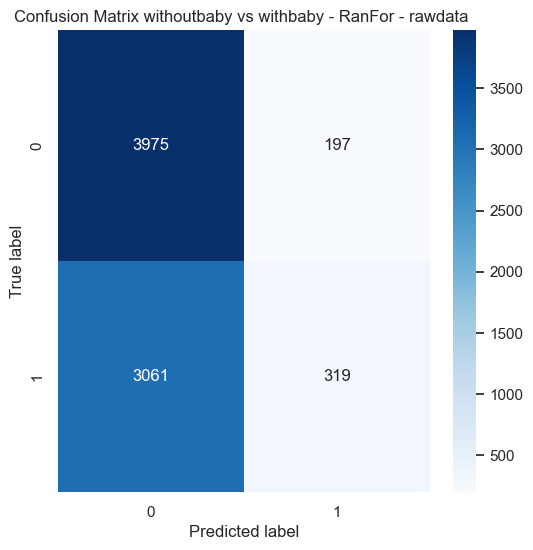

In [83]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Blues", ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix withoutbaby vs withbaby - RanFor - rawdata ')
plt.show()



# Training with extracted features

In [86]:
# Random forest Model with extracted features data

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_1_withfeatures.drop('Infant_Presence',axis=1)
Y = dataset_1_withfeatures['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for extracted features data:", accuracy_score(y_test, y_pred))
print("Classification Report for extracted features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for extracted features data: 1.0
Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4172
         1.0       1.00      1.00      1.00      3380

    accuracy                           1.00      7552
   macro avg       1.00      1.00      1.00      7552
weighted avg       1.00      1.00      1.00      7552



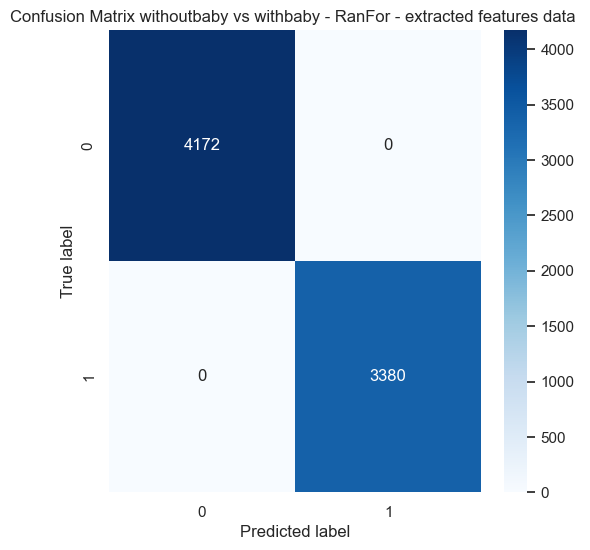

In [88]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Blues", ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix withoutbaby vs withbaby - RanFor - extracted features data ')
plt.show()

# Feature selection for overcoming OVERFITTING

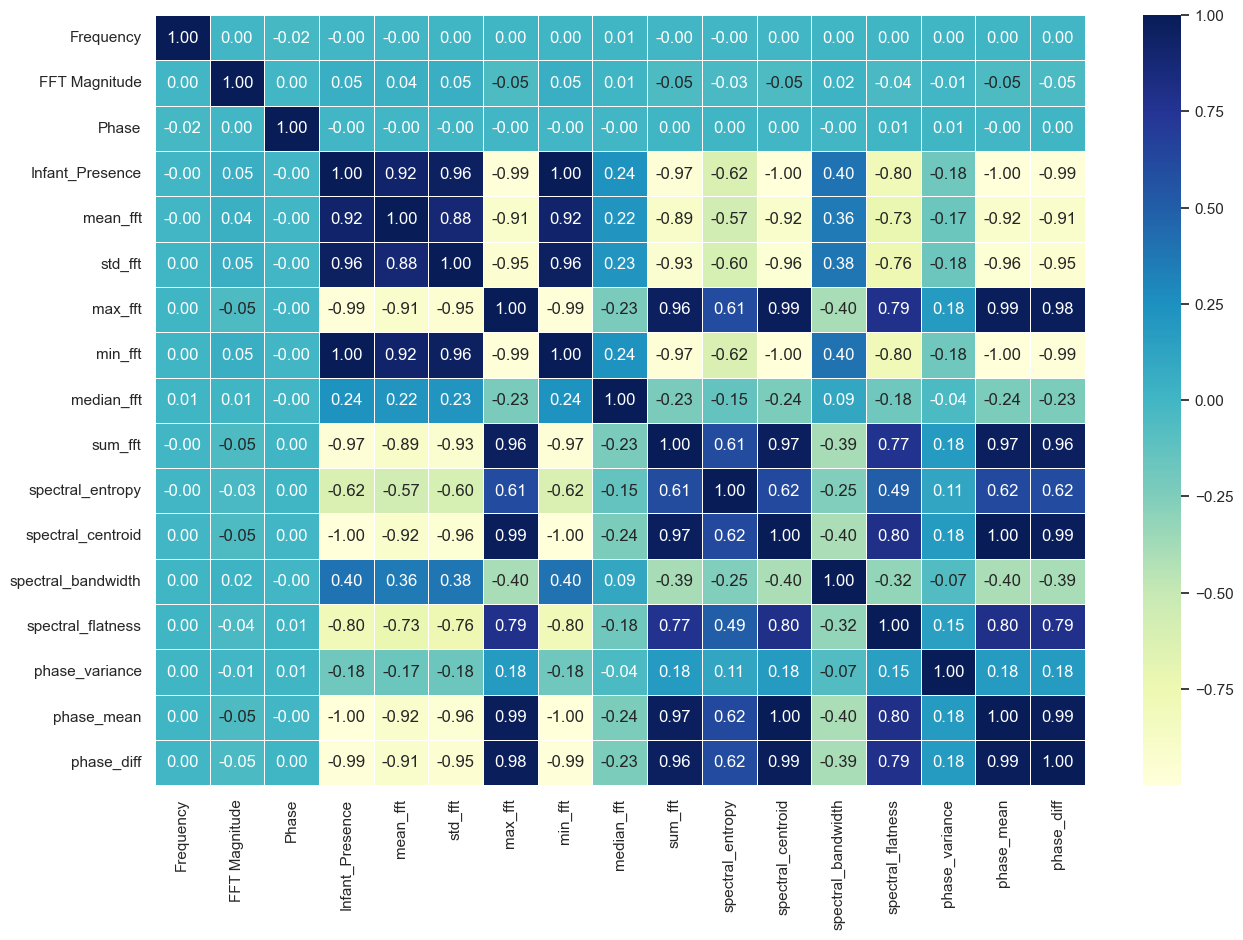

In [91]:
# Plotting correlation matrix for extracted features
corr_matrix = dataset_1_withfeatures.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')



In [92]:
# Set a threshold for correlation (e.g., 0.8)
threshold = 0.8

# Find pairs of highly correlated features
highly_correlated = np.where(np.abs(corr_matrix) > threshold)

# Create a set to store the columns to drop
to_drop = set()

# Loop through the indices of the highly correlated pairs
for i, j in zip(*highly_correlated):
    if i != j:  # Avoid diagonal (self-correlation)
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        # Ensure we do NOT drop 'Infant_Presence'
        if feature_j != "Infant_Presence":
            to_drop.add(feature_j)  # Drop one of the correlated features

# Drop the highly correlated features from the dataframe
dataset_1_reduced = dataset_1_withfeatures.drop(columns=to_drop)

# Display the dropped features and new dataframe shape
print("Dropped features: ", to_drop)
print("New dataframe shape: ", dataset_1_reduced.shape)


Dropped features:  {'sum_fft', 'max_fft', 'phase_mean', 'mean_fft', 'std_fft', 'phase_diff', 'spectral_centroid', 'min_fft'}
New dataframe shape:  (37758, 9)


In [93]:
dataset_1_reduced

,Frequency,FFT Magnitude,Phase,Infant_Presence,median_fft,spectral_entropy,spectral_bandwidth,spectral_flatness,phase_variance
0,0.000000,87853.614686,0.000000,0.0,1283.954654,9.477068,615227.044825,0.811479,3.388961
1,93.005952,42906.081564,3.087250,0.0,1273.015872,9.722488,602379.911348,0.776400,3.331675
2,186.011905,3807.554627,-1.950552,0.0,1252.867700,9.460078,588218.845290,0.799783,3.311097
3,279.017857,3850.745335,1.609702,0.0,1295.532257,9.950122,590443.691747,0.801079,3.285052
4,372.023810,2781.757042,-1.300276,0.0,1292.278573,9.520437,605537.204078,0.786816,3.269647
...,...,...,...,...,...,...,...,...,...
16753,-582.744063,586.090809,1.336270,1.0,1278.368773,9.434915,611625.187771,0.769556,3.323762
16754,-466.195250,1444.328725,-1.171194,1.0,1305.948042,9.342957,615804.950166,0.778311,3.354727
16755,-349.646438,2090.004623,-2.960240,1.0,1289.340705,9.233364,608537.323289,0.762357,3.204690
16756,-233.097625,2281.292123,1.047087,1.0,1259.642653,9.483743,619617.801601,0.749656,3.336282


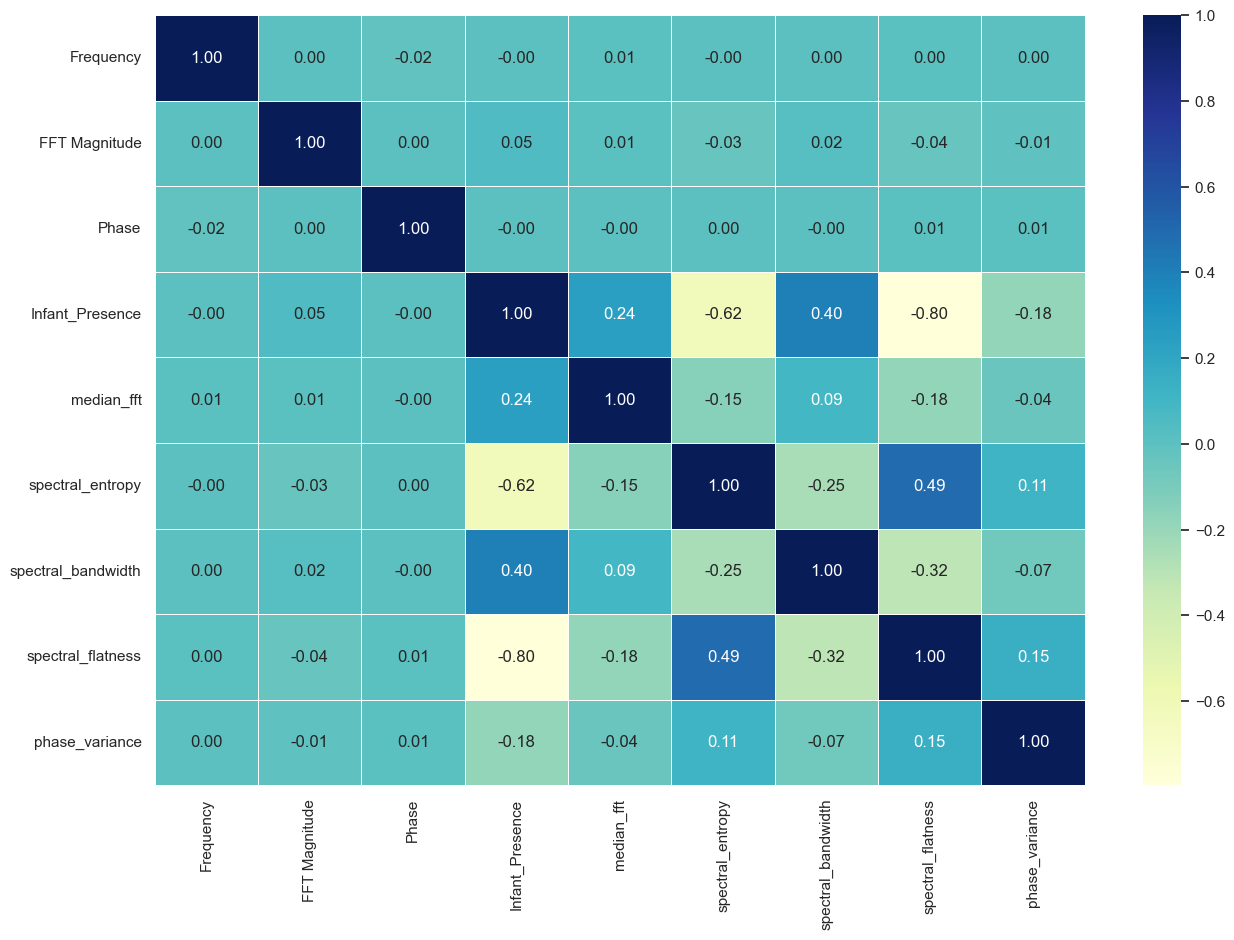

In [94]:
corr_matrix = dataset_1_reduced.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')


# Random Forest with selected features using Correlation matrix

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_1_reduced.drop('Infant_Presence',axis=1)
Y = dataset_1_reduced['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for selected features data:", accuracy_score(y_test, y_pred))
print("Classification Report for selected features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for selected features data: 0.9682203389830508
Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      4172
         1.0       1.00      0.93      0.96      3380

    accuracy                           0.97      7552
   macro avg       0.97      0.96      0.97      7552
weighted avg       0.97      0.97      0.97      7552



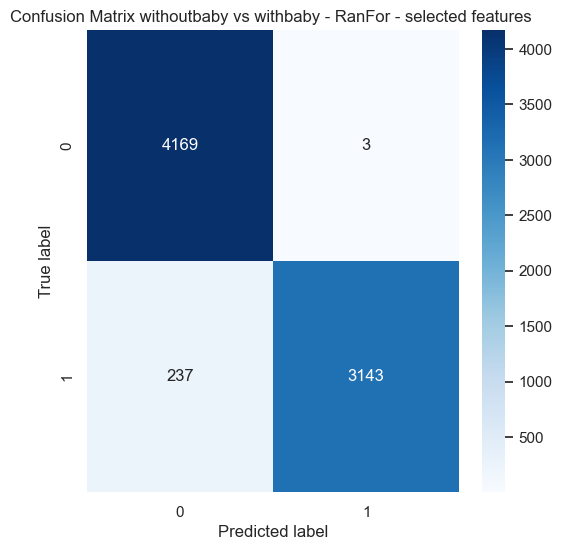

In [97]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Blues", ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix withoutbaby vs withbaby - RanFor - selected features ')
plt.show()


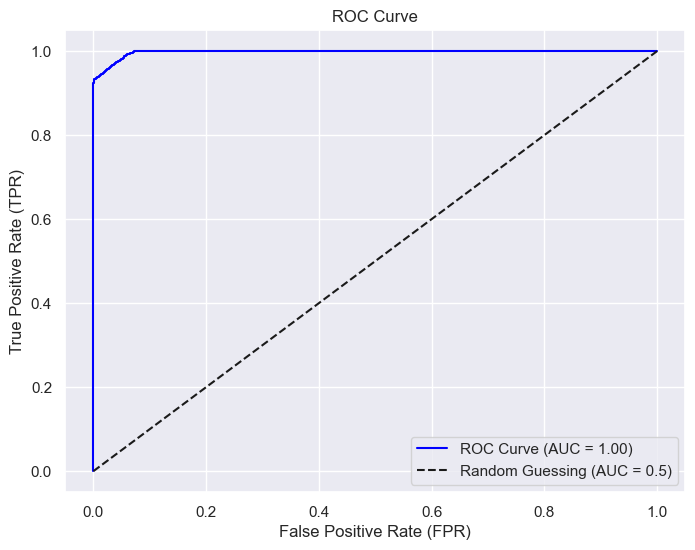

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


C:\Users\ANUSHRUTH\AppData\Local\Temp\ipykernel_24008\3606609151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


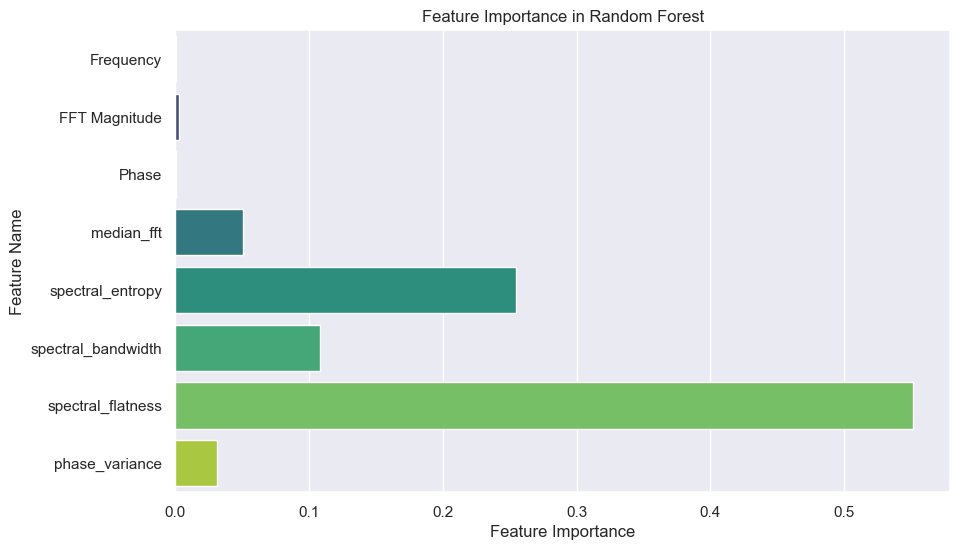

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
feature_importances = clf.feature_importances_

# Ensure correct feature names
features = dataset_1_reduced.drop('Infant_Presence', axis=1).columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest')
plt.show()


In [100]:
import joblib

# Save the trained Random Forest model
joblib.dump(clf, 'random_forest_model_Baby_Detection.pkl')


['random_forest_model_Baby_Detection.pkl']

In [101]:
# Load the trained Random Forest model
#clf = joblib.load('random_forest_model_Baby_Detection.pkl')

# Example: Make predictions on new data
#y_pred_new = clf.predict(X_new)


# SVM Model

In [118]:
# SVM model with raw data

In [120]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
X = dataset_1_rawdata.drop(columns=['Infant_Presence']).values
y = dataset_1_rawdata['Infant_Presence'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Evaluate SVM
print("SVM Accuracy rawdata:", accuracy_score(y_test, y_pred))
print("\nClassification Report for rawdata:\n", classification_report(y_test, y_pred))

SVM Accuracy rawdata: 0.5654131355932204

Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.56      0.97      0.71      4172
         1.0       0.63      0.07      0.13      3380

    accuracy                           0.57      7552
   macro avg       0.60      0.52      0.42      7552
weighted avg       0.59      0.57      0.45      7552



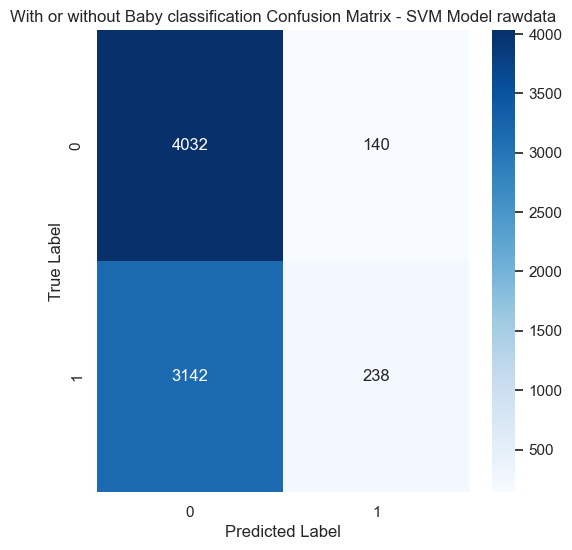

In [121]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("With or without Baby classification Confusion Matrix - SVM Model rawdata")
plt.show()

In [123]:
# SVM model with extracted features

In [124]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
X = dataset_1_withfeatures.drop(columns=['Infant_Presence']).values
y = dataset_1_withfeatures['Infant_Presence'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Evaluate SVM
print("SVM Accuracy extracted features data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for extracted features data:\n", classification_report(y_test, y_pred))

SVM Accuracy extracted features data: 1.0

Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4172
         1.0       1.00      1.00      1.00      3380

    accuracy                           1.00      7552
   macro avg       1.00      1.00      1.00      7552
weighted avg       1.00      1.00      1.00      7552



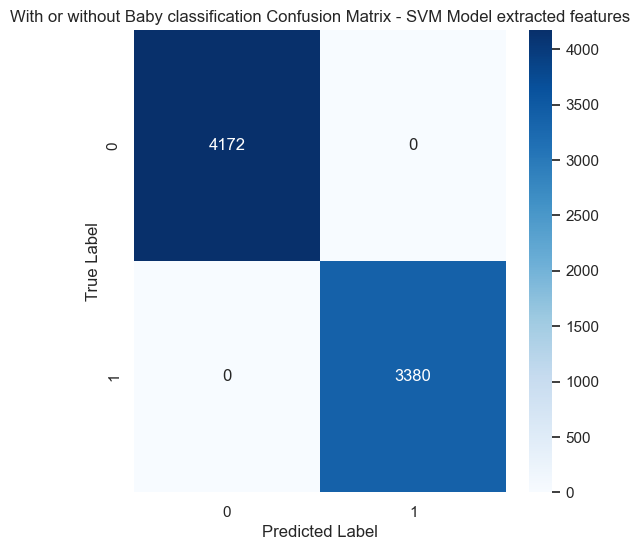

In [125]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("With or without Baby classification Confusion Matrix - SVM Model extracted features")
plt.show()

In [126]:
# SVM model with selected features using correlation matrix for overcoming overfitting

In [127]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
X = dataset_1_reduced.drop(columns=['Infant_Presence']).values
y = dataset_1_reduced['Infant_Presence'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Evaluate SVM
print("SVM Accuracy selected features data:", accuracy_score(y_test, y_pred))
print("\nClassification Report for selected features data:\n", classification_report(y_test, y_pred))

SVM Accuracy selected features data: 0.9569650423728814

Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      4172
         1.0       0.96      0.95      0.95      3380

    accuracy                           0.96      7552
   macro avg       0.96      0.96      0.96      7552
weighted avg       0.96      0.96      0.96      7552



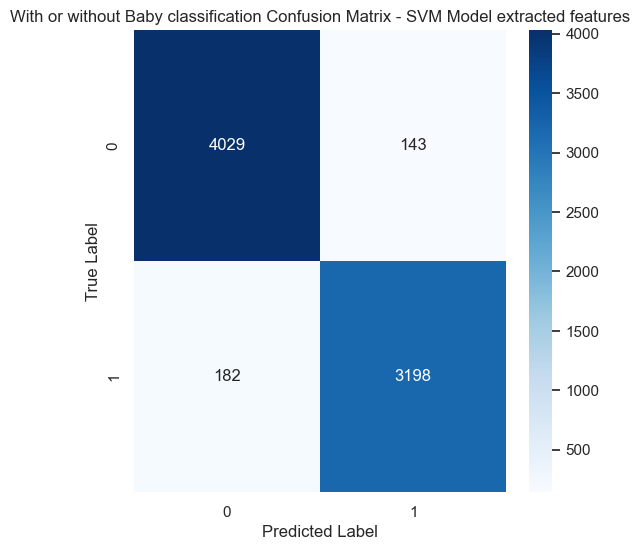

In [128]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("With or without Baby classification Confusion Matrix - SVM Model extracted features")
plt.show()

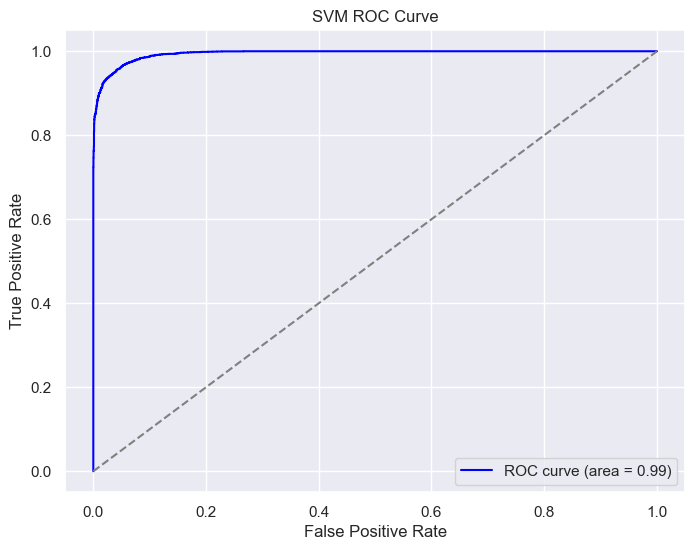

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance

# Enable probability estimation in SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

# Get predicted probabilities for ROC curve
y_probs = svm_model.predict_proba(X_test)[:, 1]  

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()



C:\Users\ANUSHRUTH\AppData\Local\Temp\ipykernel_24008\625188403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


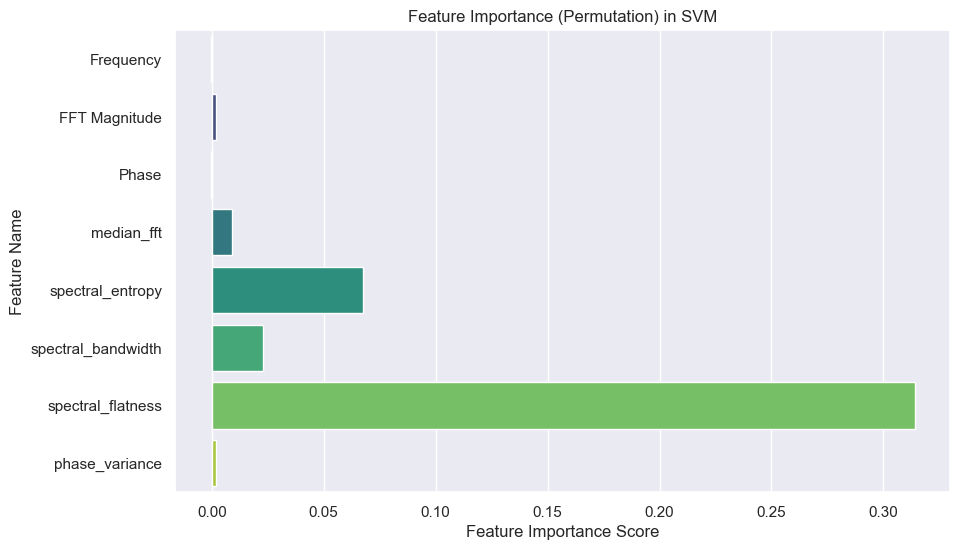

In [130]:
# Compute Feature Importance using Permutation Importance
perm_importance = permutation_importance(svm_model, X_test, y_test, scoring='accuracy')
feature_importances = perm_importance.importances_mean

# Ensure correct feature names
features = dataset_1_reduced.drop(columns=['Infant_Presence']).columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance (Permutation) in SVM')
plt.show()


In [131]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, 'svm_model_Baby_Detection.pkl')

# Save the scaler
joblib.dump(scaler, 'svm_scaler_Baby_Detection.pkl')


['svm_scaler_Baby_Detection.pkl']

In [ ]:
# Load the trained SVM model
#svm_model = joblib.load('svm_model_Baby_Detection.pkl')

# Load the scaler
#scaler = joblib.load('svm_scaler_Baby_Detection.pkl')

# Example: Transform new data and make predictions
#X_new_scaled = scaler.transform(X_new)
#y_pred = svm_model.predict(X_new_scaled)
